In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
processed_labeled = pd.read_csv("dataset/processed_labeled_with_extra.csv")
    
processed_labeled_transactions = processed_labeled.copy()

In [3]:
processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,operation_type,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,a7b4f041-ef6a-4e17-baf9-cd471ef0f484,ef1756b6-354c-4ea4-b175-4eba835b60a5,38e6f7c9-e935-4c7c-8915-ef923a5ca914,cash_out_type_1,9.932046e-05,0.000167,2018-11-21 15:41:23,2018-11-21 15:41:23,NaN,40-59,5.0,1.541947e+09
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,9bd89feb-e952-47c1-bbf5-d4c17b36d852,cash_out_type_3,1.285222e-05,0.000533,NaN,2018-10-22 23:43:38,NaN,>= 60,5.0,1.530573e+09
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,9bd89feb-e952-47c1-bbf5-d4c17b36d852,cash_out_type_3,1.582566e-05,0.000347,2018-11-19 16:11:57,2018-11-19 16:12:00,NaN,>= 60,5.0,1.530573e+09
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,e573e2d3-39af-4f71-97df-bf400e854a8a,cash_out_type_3,5.672962e-07,0.000572,NaN,2018-10-29 15:20:49,NaN,>= 60,5.0,1.530573e+09
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,88f94e8a-0145-489f-9f1d-d4755456e965,cash_out_type_3,4.470917e-05,0.000346,NaN,2018-10-31 12:06:08,NaN,>= 60,5.0,1.530573e+09


In [4]:
processed_labeled_transactions.dtypes

operation_id               object
request_id                 object
account_id                 object
device_id                  object
counterparty_document      object
operation_type             object
amount                    float64
balance                   float64
requested_at               object
processed_at               object
is_fraud                   object
age_range                  object
number_of_selfies_sent    float64
oldest_inserted_at        float64
dtype: object

In [5]:
processed_labeled_transactions.fillna(value={"is_fraud":0}, inplace=True)
processed_labeled_transactions.replace({"is_fraud":True}, 1, inplace=True)

processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,operation_type,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,a7b4f041-ef6a-4e17-baf9-cd471ef0f484,ef1756b6-354c-4ea4-b175-4eba835b60a5,38e6f7c9-e935-4c7c-8915-ef923a5ca914,cash_out_type_1,9.932046e-05,0.000167,2018-11-21 15:41:23,2018-11-21 15:41:23,0,40-59,5.0,1.541947e+09
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,9bd89feb-e952-47c1-bbf5-d4c17b36d852,cash_out_type_3,1.285222e-05,0.000533,NaN,2018-10-22 23:43:38,0,>= 60,5.0,1.530573e+09
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,9bd89feb-e952-47c1-bbf5-d4c17b36d852,cash_out_type_3,1.582566e-05,0.000347,2018-11-19 16:11:57,2018-11-19 16:12:00,0,>= 60,5.0,1.530573e+09
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,e573e2d3-39af-4f71-97df-bf400e854a8a,cash_out_type_3,5.672962e-07,0.000572,NaN,2018-10-29 15:20:49,0,>= 60,5.0,1.530573e+09
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,88f94e8a-0145-489f-9f1d-d4755456e965,cash_out_type_3,4.470917e-05,0.000346,NaN,2018-10-31 12:06:08,0,>= 60,5.0,1.530573e+09


In [6]:
processed_labeled_transactions.dtypes

operation_id               object
request_id                 object
account_id                 object
device_id                  object
counterparty_document      object
operation_type             object
amount                    float64
balance                   float64
requested_at               object
processed_at               object
is_fraud                    int64
age_range                  object
number_of_selfies_sent    float64
oldest_inserted_at        float64
dtype: object

In [7]:
data_set_len = len(processed_labeled_transactions)
fraud_transactions = len(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1])
account_unique_len = len(processed_labeled_transactions.account_id.unique())
account_unique_fraud_len = len(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].account_id.unique())
device_unique_len = len(processed_labeled_transactions.device_id.unique())
device_unique_fraud_len = len(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].device_id.unique())
operation_type_unique_len = len(processed_labeled_transactions.operation_type.unique())
operation_id_len = len(processed_labeled_transactions.operation_id.unique())
request_id_len = len(processed_labeled_transactions.request_id.unique())
counterparty_document_len = len(processed_labeled_transactions.counterparty_document.unique())

print("Dataset Len", data_set_len)
print("Fraud transaction Len", fraud_transactions)
print("Uniques account", account_unique_len)
print("Uniques fraud account", account_unique_fraud_len)
print("Uniques devices", device_unique_len)
print("Uniques fraud devices", device_unique_fraud_len)
print("Uniques operations", operation_type_unique_len)
print("Uniques operations id", operation_id_len)
print("Uniques request id", request_id_len)
print("Uniques counterparty document", request_id_len)

fraud = len(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1])
not_fraud = len(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0])

print(f"Ration fraud: {fraud/data_set_len}, not fraud {not_fraud/data_set_len}")

Dataset Len 940935
Fraud transaction Len 1535
Uniques account 63723
Uniques fraud account 630
Uniques devices 74928
Uniques fraud devices 218
Uniques operations 4
Uniques operations id 940767
Uniques request id 940935
Uniques counterparty document 940935
Ration fraud: 0.0016313560447852402, not fraud 0.9983686439552147


In [8]:
processed_labeled_transactions.isna().sum()

operation_id                 169
request_id                     0
account_id                     0
device_id                      0
counterparty_document          0
operation_type                 0
amount                         0
balance                    53960
requested_at              544491
processed_at                   0
is_fraud                       0
age_range                    163
number_of_selfies_sent         4
oldest_inserted_at             0
dtype: int64

In [9]:
# operation type dummie
dummie_operation_type = pd.get_dummies(processed_labeled_transactions.operation_type)

processed_labeled_transactions = pd.concat((processed_labeled_transactions.drop("operation_type", axis=1),
                                              dummie_operation_type), axis=1)
processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,a7b4f041-ef6a-4e17-baf9-cd471ef0f484,ef1756b6-354c-4ea4-b175-4eba835b60a5,38e6f7c9-e935-4c7c-8915-ef923a5ca914,9.932046e-05,0.000167,2018-11-21 15:41:23,2018-11-21 15:41:23,0,40-59,5.0,1.541947e+09,1,0,0,0
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.285222e-05,0.000533,NaN,2018-10-22 23:43:38,0,>= 60,5.0,1.530573e+09,0,0,1,0
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.582566e-05,0.000347,2018-11-19 16:11:57,2018-11-19 16:12:00,0,>= 60,5.0,1.530573e+09,0,0,1,0
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,e573e2d3-39af-4f71-97df-bf400e854a8a,5.672962e-07,0.000572,NaN,2018-10-29 15:20:49,0,>= 60,5.0,1.530573e+09,0,0,1,0
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,ed310df0-6834-4899-811e-5faf13b2a99c,ef1756b6-354c-4ea4-b175-4eba835b60a5,88f94e8a-0145-489f-9f1d-d4755456e965,4.470917e-05,0.000346,NaN,2018-10-31 12:06:08,0,>= 60,5.0,1.530573e+09,0,0,1,0


In [10]:
def vector_2_dict(uniques_entry):
    """
    Args:
    
    devices_unique - np.array
    """
    
    unique_map = {}
    
    i = 0
    for unique in uniques_entry:
        
        if unique not in unique_map.keys():
            unique_map[unique] = i
        
        i += 1
        
    return unique_map
        
    

In [11]:
devices_dic = vector_2_dict(np.array(processed_labeled_transactions.device_id.unique()))

In [12]:
processed_labeled_transactions.device_id = [devices_dic[device] for device in processed_labeled_transactions.device_id]

processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,a7b4f041-ef6a-4e17-baf9-cd471ef0f484,0,38e6f7c9-e935-4c7c-8915-ef923a5ca914,9.932046e-05,0.000167,2018-11-21 15:41:23,2018-11-21 15:41:23,0,40-59,5.0,1.541947e+09,1,0,0,0
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,ed310df0-6834-4899-811e-5faf13b2a99c,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.285222e-05,0.000533,NaN,2018-10-22 23:43:38,0,>= 60,5.0,1.530573e+09,0,0,1,0
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,ed310df0-6834-4899-811e-5faf13b2a99c,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.582566e-05,0.000347,2018-11-19 16:11:57,2018-11-19 16:12:00,0,>= 60,5.0,1.530573e+09,0,0,1,0
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,ed310df0-6834-4899-811e-5faf13b2a99c,0,e573e2d3-39af-4f71-97df-bf400e854a8a,5.672962e-07,0.000572,NaN,2018-10-29 15:20:49,0,>= 60,5.0,1.530573e+09,0,0,1,0
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,ed310df0-6834-4899-811e-5faf13b2a99c,0,88f94e8a-0145-489f-9f1d-d4755456e965,4.470917e-05,0.000346,NaN,2018-10-31 12:06:08,0,>= 60,5.0,1.530573e+09,0,0,1,0


In [13]:
account_dic = vector_2_dict(np.array(processed_labeled_transactions.account_id.unique()))

processed_labeled_transactions.account_id = [account_dic[account] for account in processed_labeled_transactions.account_id]

processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,0,0,38e6f7c9-e935-4c7c-8915-ef923a5ca914,9.932046e-05,0.000167,2018-11-21 15:41:23,2018-11-21 15:41:23,0,40-59,5.0,1.541947e+09,1,0,0,0
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,1,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.285222e-05,0.000533,NaN,2018-10-22 23:43:38,0,>= 60,5.0,1.530573e+09,0,0,1,0
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,1,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.582566e-05,0.000347,2018-11-19 16:11:57,2018-11-19 16:12:00,0,>= 60,5.0,1.530573e+09,0,0,1,0
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,1,0,e573e2d3-39af-4f71-97df-bf400e854a8a,5.672962e-07,0.000572,NaN,2018-10-29 15:20:49,0,>= 60,5.0,1.530573e+09,0,0,1,0
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,1,0,88f94e8a-0145-489f-9f1d-d4755456e965,4.470917e-05,0.000346,NaN,2018-10-31 12:06:08,0,>= 60,5.0,1.530573e+09,0,0,1,0


In [14]:
processed_labeled_transactions.processed_at = pd.to_datetime(processed_labeled_transactions.processed_at)

In [15]:
processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,0,0,38e6f7c9-e935-4c7c-8915-ef923a5ca914,9.932046e-05,0.000167,2018-11-21 15:41:23,2018-11-21 15:41:23,0,40-59,5.0,1.541947e+09,1,0,0,0
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,1,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.285222e-05,0.000533,NaN,2018-10-22 23:43:38,0,>= 60,5.0,1.530573e+09,0,0,1,0
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,1,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.582566e-05,0.000347,2018-11-19 16:11:57,2018-11-19 16:12:00,0,>= 60,5.0,1.530573e+09,0,0,1,0
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,1,0,e573e2d3-39af-4f71-97df-bf400e854a8a,5.672962e-07,0.000572,NaN,2018-10-29 15:20:49,0,>= 60,5.0,1.530573e+09,0,0,1,0
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,1,0,88f94e8a-0145-489f-9f1d-d4755456e965,4.470917e-05,0.000346,NaN,2018-10-31 12:06:08,0,>= 60,5.0,1.530573e+09,0,0,1,0


In [16]:
processed_labeled_transactions.dtypes

operation_id                      object
request_id                        object
account_id                         int64
device_id                          int64
counterparty_document             object
amount                           float64
balance                          float64
requested_at                      object
processed_at              datetime64[ns]
is_fraud                           int64
age_range                         object
number_of_selfies_sent           float64
oldest_inserted_at               float64
cash_out_type_1                    uint8
cash_out_type_2                    uint8
cash_out_type_3                    uint8
cash_out_type_6                    uint8
dtype: object

In [17]:
#from datetime fo timestamp to go back we have to use datetime.datetime.fromtimestamp()

processed_labeled_transactions.processed_at = [date_time.timestamp() + 10800 for date_time in processed_labeled_transactions.processed_at]

processed_labeled_transactions.head()

,operation_id,request_id,account_id,device_id,counterparty_document,amount,balance,requested_at,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,37e105f1-003f-465b-8179-e7705b12a24d,c1820b88-ac54-444f-b9a0-70de30124d95,0,0,38e6f7c9-e935-4c7c-8915-ef923a5ca914,9.932046e-05,0.000167,2018-11-21 15:41:23,1.542826e+09,0,40-59,5.0,1.541947e+09,1,0,0,0
1,72d66c19-130b-4d51-8ed7-e3b6c0b65034,9400a9f4-6ab8-40cd-b806-1569b693a88e,1,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.285222e-05,0.000533,NaN,1.540263e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0
2,31abd386-09f7-4f18-9b01-d2682e3c2c65,80adf85b-56cc-4730-903d-e63c75ae839a,1,0,9bd89feb-e952-47c1-bbf5-d4c17b36d852,1.582566e-05,0.000347,2018-11-19 16:11:57,1.542655e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0
3,27543733-e8a8-4593-88fb-921e205a6e0c,6edfea5c-4125-49fa-bbe7-b39433f6e49a,1,0,e573e2d3-39af-4f71-97df-bf400e854a8a,5.672962e-07,0.000572,NaN,1.540837e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0
4,6aff8f2d-0730-4f94-846b-14c059550ab2,88ddff46-6714-4a47-9407-a7d54996dde1,1,0,88f94e8a-0145-489f-9f1d-d4755456e965,4.470917e-05,0.000346,NaN,1.540998e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0


In [18]:
max_date = processed_labeled_transactions.processed_at.max()
min_date = processed_labeled_transactions.processed_at.min()

print("Data máxima:", max_date)
print("Data mínima:", min_date)

Data máxima: 1543114734.0
Data mínima: 1539831625.0


In [19]:
# date = [datetime.date()for datetime in processed_labeled_transactions.processed_at]
# time = [datetime.time()for datetime in processed_labeled_transactions.processed_at]

# columns = {"date": date, "time": time}

# for column in columns.keys():
#     if column not in processed_labeled_transactions.columns:
#         processed_labeled_transactions.insert(7, column, columns[column])


# processed_labeled_transactions.head()

In [20]:
processed_labeled_transactions.corr()

,account_id,device_id,amount,balance,processed_at,is_fraud,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
account_id,1.000000,0.936605,0.000639,-0.118943,0.030805,-0.031733,-0.011119,0.127778,-0.024468,0.314274,-0.312839,0.001893
device_id,0.936605,1.000000,0.000783,-0.124529,0.030237,-0.032270,-0.010421,0.131320,-0.021081,0.339309,-0.339272,0.001675
amount,0.000639,0.000783,1.000000,0.058773,0.002032,0.000049,-0.000084,0.000361,0.003015,0.003571,-0.004489,-0.000036
balance,-0.118943,-0.124529,0.058773,1.000000,0.015222,-0.002598,-0.016387,-0.283422,0.020092,0.037897,-0.044221,-0.000271
processed_at,0.030805,0.030237,0.002032,0.015222,1.000000,-0.006212,-0.010542,0.063272,-0.000934,0.011392,-0.011319,-0.001043
is_fraud,-0.031733,-0.032270,0.000049,-0.002598,-0.006212,1.000000,0.000773,0.001187,0.005346,0.017931,-0.019762,-0.000132
number_of_selfies_sent,-0.011119,-0.010421,-0.000084,-0.016387,-0.010542,0.000773,1.000000,-0.135436,0.006826,-0.008444,0.006654,-0.000253
oldest_inserted_at,0.127778,0.131320,0.000361,-0.283422,0.063272,0.001187,-0.135436,1.000000,-0.014299,0.023351,-0.019594,-0.014236
cash_out_type_1,-0.024468,-0.021081,0.003015,0.020092,-0.000934,0.005346,0.006826,-0.014299,1.000000,-0.200642,-0.079909,-0.000421
cash_out_type_2,0.314274,0.339309,0.003571,0.037897,0.011392,0.017931,-0.008444,0.023351,-0.200642,1.000000,-0.960473,-0.005063


In [21]:
processed_labeled_transactions.drop(labels=["operation_id","request_id","counterparty_document", "requested_at"],
                                    axis=1, inplace=True)
processed_labeled_transactions.head()

,account_id,device_id,amount,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0,0,9.932046e-05,0.000167,1.542826e+09,0,40-59,5.0,1.541947e+09,1,0,0,0
1,1,0,1.285222e-05,0.000533,1.540263e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0
2,1,0,1.582566e-05,0.000347,1.542655e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0
3,1,0,5.672962e-07,0.000572,1.540837e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0
4,1,0,4.470917e-05,0.000346,1.540998e+09,0,>= 60,5.0,1.530573e+09,0,0,1,0


In [22]:
processed_labeled_transactions.isna().sum()

account_id                    0
device_id                     0
amount                        0
balance                   53960
processed_at                  0
is_fraud                      0
age_range                   163
number_of_selfies_sent        4
oldest_inserted_at            0
cash_out_type_1               0
cash_out_type_2               0
cash_out_type_3               0
cash_out_type_6               0
dtype: int64

In [23]:
mean_balance = processed_labeled_transactions.balance.mean()
print(mean_balance)

0.00011713462447888343


In [24]:
processed_labeled_transactions.balance = processed_labeled_transactions.balance.fillna(mean_balance)

processed_labeled_transactions.isna().sum()

account_id                  0
device_id                   0
amount                      0
balance                     0
processed_at                0
is_fraud                    0
age_range                 163
number_of_selfies_sent      4
oldest_inserted_at          0
cash_out_type_1             0
cash_out_type_2             0
cash_out_type_3             0
cash_out_type_6             0
dtype: int64

In [25]:
mean_number_of_selfies_sent = processed_labeled_transactions.number_of_selfies_sent.mean()
print(mean_number_of_selfies_sent)

processed_labeled_transactions.number_of_selfies_sent = processed_labeled_transactions.number_of_selfies_sent.fillna(mean_number_of_selfies_sent)

processed_labeled_transactions.isna().sum()

5.521811907568143


account_id                  0
device_id                   0
amount                      0
balance                     0
processed_at                0
is_fraud                    0
age_range                 163
number_of_selfies_sent      0
oldest_inserted_at          0
cash_out_type_1             0
cash_out_type_2             0
cash_out_type_3             0
cash_out_type_6             0
dtype: int64

In [26]:
processed_labeled_transactions.age_range.unique()

array(['40-59', '>= 60', '25-39', '18-24', '< 18', nan], dtype=object)

In [27]:
age_range_dic = vector_2_dict(np.array(processed_labeled_transactions.age_range.unique()))

processed_labeled_transactions.age_range = [age_range_dic[age_range] for age_range in processed_labeled_transactions.age_range]

display(processed_labeled_transactions.head())

processed_labeled_transactions.age_range.count()

,account_id,device_id,amount,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0,0,9.932046e-05,0.000167,1.542826e+09,0,0,5.0,1.541947e+09,1,0,0,0
1,1,0,1.285222e-05,0.000533,1.540263e+09,0,1,5.0,1.530573e+09,0,0,1,0
2,1,0,1.582566e-05,0.000347,1.542655e+09,0,1,5.0,1.530573e+09,0,0,1,0
3,1,0,5.672962e-07,0.000572,1.540837e+09,0,1,5.0,1.530573e+09,0,0,1,0
4,1,0,4.470917e-05,0.000346,1.540998e+09,0,1,5.0,1.530573e+09,0,0,1,0


940935

In [28]:
print(age_range_dic)

{'40-59': 0, '>= 60': 1, '25-39': 2, '18-24': 3, '< 18': 4, nan: 5}


In [29]:
processed_labeled_transactions.age_range = processed_labeled_transactions.age_range.replace(5, np.nan)

processed_labeled_transactions.isna().sum()

account_id                  0
device_id                   0
amount                      0
balance                     0
processed_at                0
is_fraud                    0
age_range                 163
number_of_selfies_sent      0
oldest_inserted_at          0
cash_out_type_1             0
cash_out_type_2             0
cash_out_type_3             0
cash_out_type_6             0
dtype: int64

In [30]:
processed_labeled_transactions.groupby("age_range")["age_range"].count()

age_range
0.0    278400
1.0     37093
2.0    509859
3.0    112652
4.0      2768
Name: age_range, dtype: int64

In [31]:
age_mode = int(processed_labeled_transactions.age_range.mode())

age_mode

2

In [32]:
processed_labeled_transactions.age_range = processed_labeled_transactions.age_range.fillna(age_mode)

processed_labeled_transactions.isna().sum()

account_id                0
device_id                 0
amount                    0
balance                   0
processed_at              0
is_fraud                  0
age_range                 0
number_of_selfies_sent    0
oldest_inserted_at        0
cash_out_type_1           0
cash_out_type_2           0
cash_out_type_3           0
cash_out_type_6           0
dtype: int64

In [33]:
processed_labeled_transactions.corr()

,account_id,device_id,amount,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
account_id,1.000000,0.936605,0.000639,-0.115446,0.030805,-0.031733,0.014728,-0.011119,0.127778,-0.024468,0.314274,-0.312839,0.001893
device_id,0.936605,1.000000,0.000783,-0.120909,0.030237,-0.032270,0.010916,-0.010421,0.131320,-0.021081,0.339309,-0.339272,0.001675
amount,0.000639,0.000783,1.000000,0.058750,0.002032,0.000049,0.002367,-0.000084,0.000361,0.003015,0.003571,-0.004489,-0.000036
balance,-0.115446,-0.120909,0.058750,1.000000,0.013672,-0.002463,0.041070,-0.015854,-0.277117,0.019471,0.036898,-0.043073,-0.000271
processed_at,0.030805,0.030237,0.002032,0.013672,1.000000,-0.006212,0.005170,-0.010542,0.063272,-0.000934,0.011392,-0.011319,-0.001043
is_fraud,-0.031733,-0.032270,0.000049,-0.002463,-0.006212,1.000000,0.001232,0.000773,0.001187,0.005346,0.017931,-0.019762,-0.000132
age_range,0.014728,0.010916,0.002367,0.041070,0.005170,0.001232,1.000000,-0.008867,0.025707,0.002038,0.043571,-0.044924,0.001572
number_of_selfies_sent,-0.011119,-0.010421,-0.000084,-0.015854,-0.010542,0.000773,-0.008867,1.000000,-0.135435,0.006826,-0.008444,0.006654,-0.000253
oldest_inserted_at,0.127778,0.131320,0.000361,-0.277117,0.063272,0.001187,0.025707,-0.135435,1.000000,-0.014299,0.023351,-0.019594,-0.014236
cash_out_type_1,-0.024468,-0.021081,0.003015,0.019471,-0.000934,0.005346,0.002038,0.006826,-0.014299,1.000000,-0.200642,-0.079909,-0.000421


In [34]:
time_client = processed_labeled_transactions.processed_at - processed_labeled_transactions.oldest_inserted_at

display(processed_labeled_transactions.head())
display(time_client.head())

,account_id,device_id,amount,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0,0,9.932046e-05,0.000167,1.542826e+09,0,0.0,5.0,1.541947e+09,1,0,0,0
1,1,0,1.285222e-05,0.000533,1.540263e+09,0,1.0,5.0,1.530573e+09,0,0,1,0
2,1,0,1.582566e-05,0.000347,1.542655e+09,0,1.0,5.0,1.530573e+09,0,0,1,0
3,1,0,5.672962e-07,0.000572,1.540837e+09,0,1.0,5.0,1.530573e+09,0,0,1,0
4,1,0,4.470917e-05,0.000346,1.540998e+09,0,1.0,5.0,1.530573e+09,0,0,1,0


0    8.783463e+05
1    9.689721e+06
2    1.208182e+07
3    1.026435e+07
4    1.042547e+07
dtype: float64

In [35]:
processed_labeled_transactions.insert(8, "time_client", time_client)

processed_labeled_transactions.head()

,account_id,device_id,amount,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,time_client,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
0,0,0,9.932046e-05,0.000167,1.542826e+09,0,0.0,5.0,8.783463e+05,1.541947e+09,1,0,0,0
1,1,0,1.285222e-05,0.000533,1.540263e+09,0,1.0,5.0,9.689721e+06,1.530573e+09,0,0,1,0
2,1,0,1.582566e-05,0.000347,1.542655e+09,0,1.0,5.0,1.208182e+07,1.530573e+09,0,0,1,0
3,1,0,5.672962e-07,0.000572,1.540837e+09,0,1.0,5.0,1.026435e+07,1.530573e+09,0,0,1,0
4,1,0,4.470917e-05,0.000346,1.540998e+09,0,1.0,5.0,1.042547e+07,1.530573e+09,0,0,1,0


In [36]:
processed_labeled_transactions.corr()

,account_id,device_id,amount,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,time_client,oldest_inserted_at,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
account_id,1.000000,0.936605,0.000639,-0.115446,0.030805,-0.031733,0.014728,-0.011119,-0.124930,0.127778,-0.024468,0.314274,-0.312839,0.001893
device_id,0.936605,1.000000,0.000783,-0.120909,0.030237,-0.032270,0.010916,-0.010421,-0.128533,0.131320,-0.021081,0.339309,-0.339272,0.001675
amount,0.000639,0.000783,1.000000,0.058750,0.002032,0.000049,0.002367,-0.000084,-0.000162,0.000361,0.003015,0.003571,-0.004489,-0.000036
balance,-0.115446,-0.120909,0.058750,1.000000,0.013672,-0.002463,0.041070,-0.015854,0.278847,-0.277117,0.019471,0.036898,-0.043073,-0.000271
processed_at,0.030805,0.030237,0.002032,0.013672,1.000000,-0.006212,0.005170,-0.010542,0.034895,0.063272,-0.000934,0.011392,-0.011319,-0.001043
is_fraud,-0.031733,-0.032270,0.000049,-0.002463,-0.006212,1.000000,0.001232,0.000773,-0.001799,0.001187,0.005346,0.017931,-0.019762,-0.000132
age_range,0.014728,0.010916,0.002367,0.041070,0.005170,0.001232,1.000000,-0.008867,-0.025235,0.025707,0.002038,0.043571,-0.044924,0.001572
number_of_selfies_sent,-0.011119,-0.010421,-0.000084,-0.015854,-0.010542,0.000773,-0.008867,1.000000,0.134589,-0.135435,0.006826,-0.008444,0.006654,-0.000253
time_client,-0.124930,-0.128533,-0.000162,0.278847,0.034895,-0.001799,-0.025235,0.134589,1.000000,-0.995181,0.014227,-0.022264,0.018509,0.014154
oldest_inserted_at,0.127778,0.131320,0.000361,-0.277117,0.063272,0.001187,0.025707,-0.135435,-0.995181,1.000000,-0.014299,0.023351,-0.019594,-0.014236


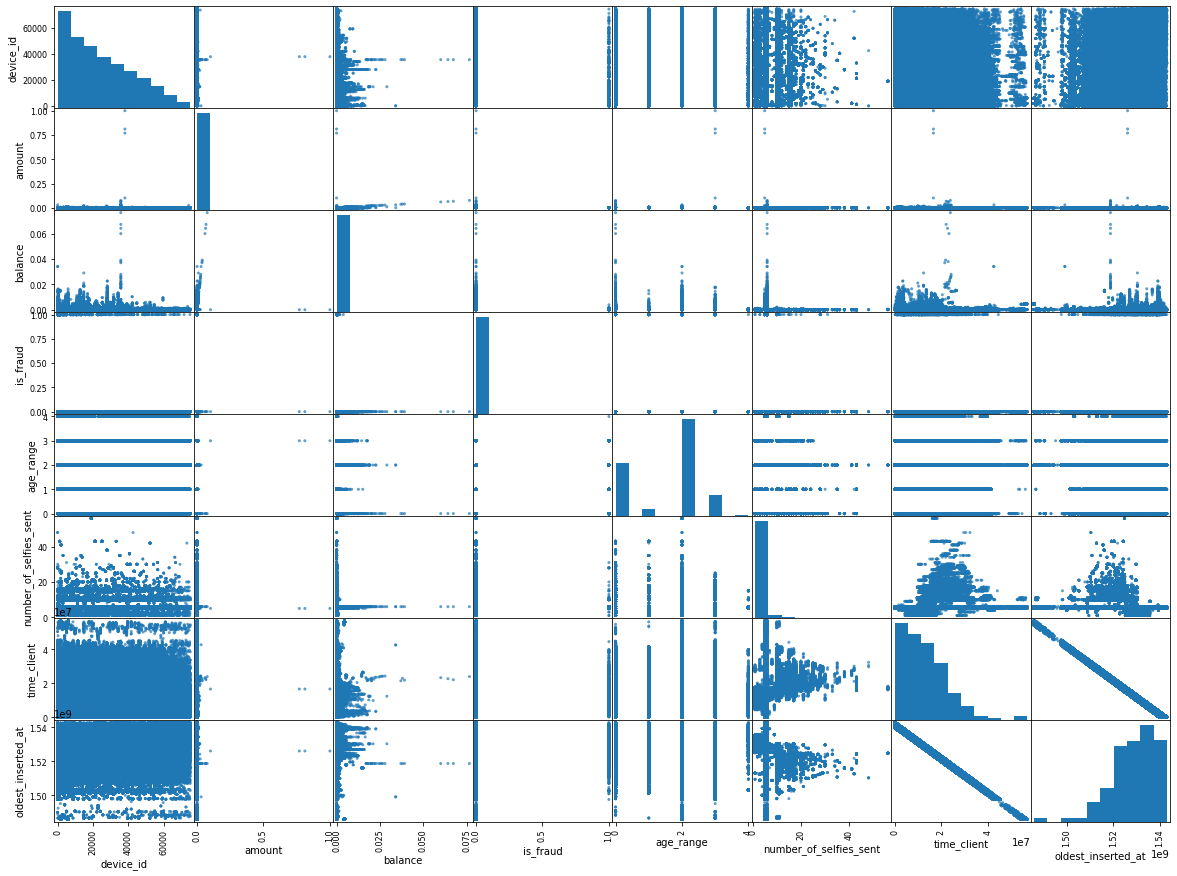

In [37]:

_ = pd.plotting.scatter_matrix(processed_labeled_transactions[["device_id", "amount",
                                                              "balance", "is_fraud",
                                                              "age_range", "number_of_selfies_sent",
                                                              "time_client", "oldest_inserted_at"]], alpha=0.7, figsize = (20,15))

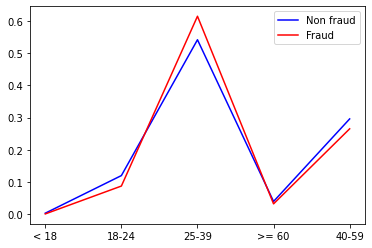

In [38]:
count_falses_age_range = processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].groupby("age_range")["age_range"].count()
count_true_age_range = processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].groupby("age_range")["age_range"].count()

falses_total = count_falses_age_range.sum()
true_total = count_true_age_range.sum()


count_true_age_range = count_true_age_range/true_total
count_falses_age_range = count_falses_age_range/falses_total


plt.plot(list(age_range_dic.keys())[:5][::-1],count_falses_age_range.iloc[::-1],
         color="b", label="Non fraud")
plt.plot(list(age_range_dic.keys())[:5][::-1],count_true_age_range.iloc[::-1],
         color="r", label="Fraud")

plt.legend()

plt.show()

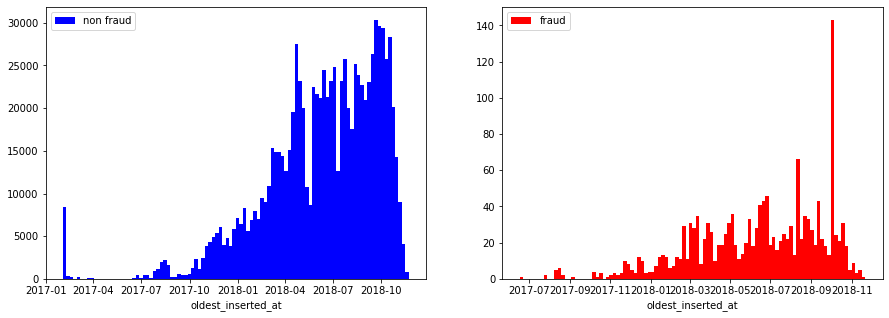

In [39]:

not_fraud = [datetime.fromtimestamp(date) for date in processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].oldest_inserted_at]
fraud = [datetime.fromtimestamp(date) for date in processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].oldest_inserted_at]

img, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(not_fraud, bins=100, color="b", label="non fraud")
axs[1].hist(fraud, bins=100, color="r", label="fraud")


axs[0].legend()
axs[1].legend()

axs[0].set_xlabel("oldest_inserted_at")
axs[1].set_xlabel("oldest_inserted_at")
plt.show()

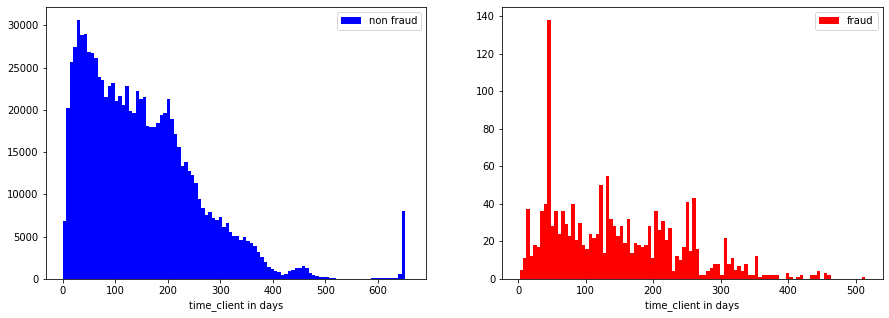

In [40]:
not_fraud = processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].time_client / (3600*24)
fraud = processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].time_client / (3600*24)

img, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].hist(not_fraud, bins=100, color="b", label="non fraud")
axs[1].hist(fraud, bins=100, color="r", label="fraud")


axs[0].legend()
axs[1].legend()

axs[0].set_xlabel("time_client in days")
axs[1].set_xlabel("time_client in days")

plt.show()

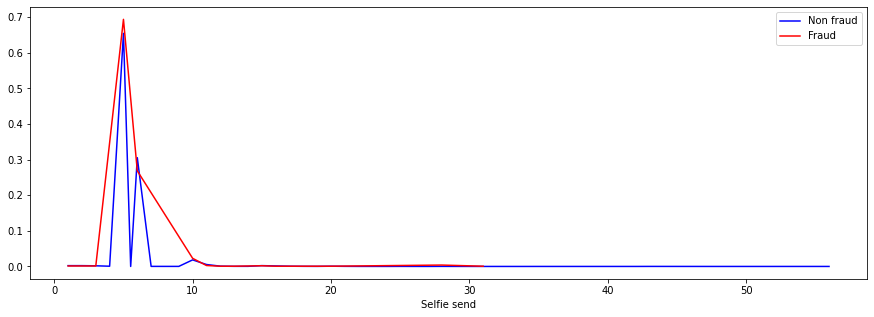

In [41]:
img, ax = plt.subplots(figsize=(15,5))

count_falses_selfie = processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].groupby("number_of_selfies_sent")["number_of_selfies_sent"].count()
count_true_selfie = processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].groupby("number_of_selfies_sent")["number_of_selfies_sent"].count()

falses_total = count_falses_selfie.sum()
true_total = count_true_selfie.sum()

count_true_selfie = count_true_selfie/true_total
count_falses_selfie = count_falses_selfie/falses_total


ax.plot(count_falses_selfie.keys(),count_falses_selfie,
         color="b", label="Non fraud")
ax.plot(count_true_selfie.keys(),count_true_selfie,
         color="r", label="Fraud")

plt.legend()
plt.xlabel("Selfie send")

plt.show()

In [42]:
from mpl_toolkits.mplot3d import Axes3D

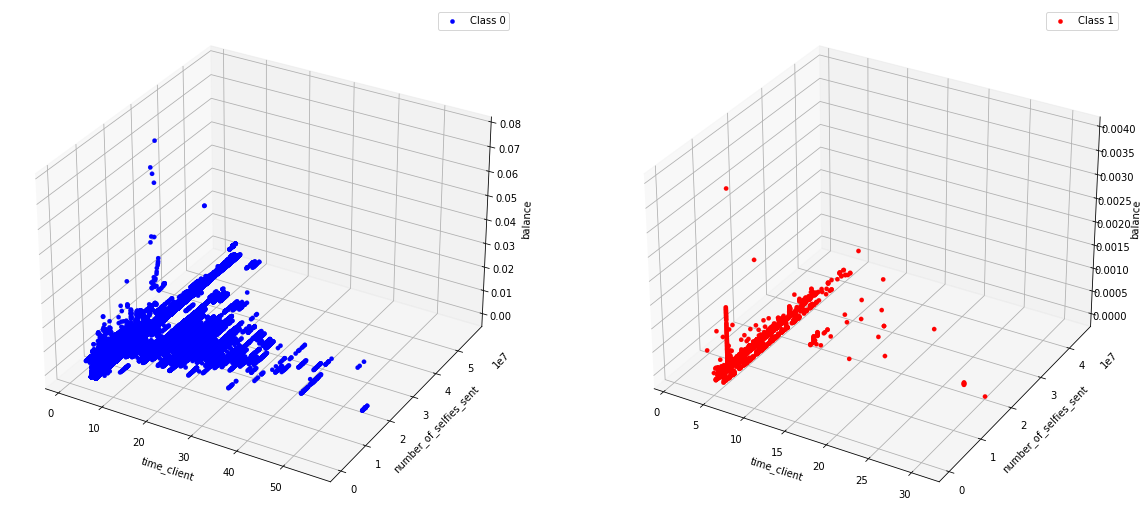

In [43]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(1,2,1, projection='3d')


ax.scatter(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].number_of_selfies_sent,
           processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].time_client,
           processed_labeled_transactions[processed_labeled_transactions.is_fraud == 0].balance, 
           label="Class 0", alpha=1, linewidth=0.15, c ="b")
plt.legend()

ax.set_xlabel("time_client")
ax.set_ylabel("number_of_selfies_sent")
ax.set_zlabel("balance")

ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].number_of_selfies_sent, 
           processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].time_client,
           processed_labeled_transactions[processed_labeled_transactions.is_fraud == 1].balance, 
           label="Class 1", alpha=1, linewidth=0.15, c="r")

plt.legend()

ax.set_xlabel("time_client")
ax.set_ylabel("number_of_selfies_sent")
ax.set_zlabel("balance")

plt.show()


In [44]:
# droping amount, because is weakly correlated if the target and oldest_inserted_at
# because is strongly correlated with time_client and time_client has a better correlation
# with the target

processed_labeled_transactions.drop(["amount", "oldest_inserted_at"], axis=1, inplace=True)

processed_labeled_transactions.corr()

,account_id,device_id,balance,processed_at,is_fraud,age_range,number_of_selfies_sent,time_client,cash_out_type_1,cash_out_type_2,cash_out_type_3,cash_out_type_6
account_id,1.000000,0.936605,-0.115446,0.030805,-0.031733,0.014728,-0.011119,-0.124930,-0.024468,0.314274,-0.312839,0.001893
device_id,0.936605,1.000000,-0.120909,0.030237,-0.032270,0.010916,-0.010421,-0.128533,-0.021081,0.339309,-0.339272,0.001675
balance,-0.115446,-0.120909,1.000000,0.013672,-0.002463,0.041070,-0.015854,0.278847,0.019471,0.036898,-0.043073,-0.000271
processed_at,0.030805,0.030237,0.013672,1.000000,-0.006212,0.005170,-0.010542,0.034895,-0.000934,0.011392,-0.011319,-0.001043
is_fraud,-0.031733,-0.032270,-0.002463,-0.006212,1.000000,0.001232,0.000773,-0.001799,0.005346,0.017931,-0.019762,-0.000132
age_range,0.014728,0.010916,0.041070,0.005170,0.001232,1.000000,-0.008867,-0.025235,0.002038,0.043571,-0.044924,0.001572
number_of_selfies_sent,-0.011119,-0.010421,-0.015854,-0.010542,0.000773,-0.008867,1.000000,0.134589,0.006826,-0.008444,0.006654,-0.000253
time_client,-0.124930,-0.128533,0.278847,0.034895,-0.001799,-0.025235,0.134589,1.000000,0.014227,-0.022264,0.018509,0.014154
cash_out_type_1,-0.024468,-0.021081,0.019471,-0.000934,0.005346,0.002038,0.006826,0.014227,1.000000,-0.200642,-0.079909,-0.000421
cash_out_type_2,0.314274,0.339309,0.036898,0.011392,0.017931,0.043571,-0.008444,-0.022264,-0.200642,1.000000,-0.960473,-0.005063


In [45]:
processed_labeled_transactions.to_csv("processed_features.csv", index=False)